# How to decide if we need to change a user interface?

![amazon-ui](amazon-ex.jpg)

# A/B test is the way to check if "small" change will result in improved business metrics

![a-b](a-b-test.jpg)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. Basic (and probably most frequent) case: two groups, compare `means`.

You are trying to increase users retention time. For that your team have developed a new user interface. Below are 
times different users spent on your website.

In [3]:
a_times = [10.35440528, 10.99206354,  6.12869861,  8.47811989, 12.7248804 ,
       11.73265766, 12.22095406, 12.8099562 , 11.74540839, 11.29651638,
       11.80797107,  7.94572271,  4.19784555,  7.50387294, 10.16213967,
        8.94711072,  9.51350476,  6.59822116,  5.19571974, 11.69393995,
       12.75649418,  9.23660269, 12.53301822,  8.53946756,  8.46736933,
        9.7510238 , 11.31335251, 10.77690105,  9.4413677 ,  8.24098345,
        4.86035243,  6.1432389 ,  7.18226681,  2.21531163,  4.95638114,
       12.63659587,  9.46392054, 14.553992  ,  5.10086576,  9.601428  ,
        9.9470964 ,  6.57471154,  9.43623108, 10.49612454,  7.97249361,
        7.17416646, 15.13347713, 15.27167257,  7.62949604,  9.25366971]

b_times = [11.43426005,  7.70636347, 14.47410034,  7.98678126, 10.93553798,
       11.46975857, 12.92429606, 14.96690765, 12.58862079,  4.99472204,
       10.12095494, 14.76352979,  9.43292588, 12.63836527,  7.0601039 ,
        5.78109412, 12.32235052, 10.72332663,  8.52206031, 13.61425068,
       13.19846314, 17.19249888,  5.31264523, 20.20991564,  9.46273423,
        7.94967209,  6.31071439,  6.94749318, 10.59982422,  7.61988794,
       13.84820591,  6.25107344, 12.09231685,  9.42304435,  9.45674061,
        8.960323  ,  8.91021953, 11.14720118, 13.7686453 , 15.27435376,
        6.46060643,  8.608558  , 11.99237414, 15.27977731, 13.07143702,
       10.73355528, 14.17241758, 12.06356734,  8.66294464, 12.00932266]

# Does retention time in group A is different from group B?

$$\bar{A} = \frac{1}{n_A}\sum{a_i}, \bar{B} = \frac{1}{n_B}\sum{B_i}$$

$$\bar{A} \  \ \ \ \ ? \ \ \ \  \ \bar{B}$$

In [4]:
print(np.mean(a_times), np.mean(b_times))

9.3741956266 10.829016870399998


# If means are different does it mean that groups are different?

Let's compare two cases

## Large standard deviation

100.06978719996839 101.03503753983856


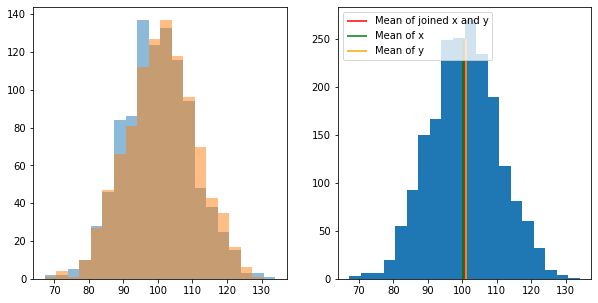

In [5]:
random = np.random.RandomState(998)

x = random.normal(100, 10, 1000)
y = random.normal(101, 10, 1000)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
bins = ax[0].hist(x, alpha=0.5, bins=20)
ax[0].hist(y, alpha=0.5, bins=bins[1]);
ax[1].hist(np.concatenate([x, y]), bins=bins[1])
ax[1].vlines(np.concatenate([x, y]).mean(), 0, 250, color='r', label='Mean of joined x and y')
ax[1].vlines(x.mean(), 0, 250, color='g', label='Mean of x')
ax[1].vlines(y.mean(), 0, 250, color='orange', label='Mean of y')
plt.legend(loc='upper left')


print(x.mean(), y.mean())

## Small standard deviation

100.00348935999841 101.00175187699195


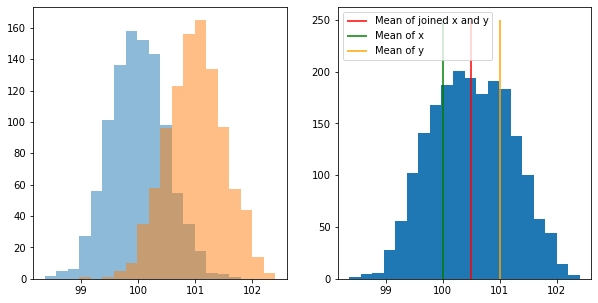

In [6]:
random = np.random.RandomState(998)

x = random.normal(100, 0.5, 1000)
y = random.normal(101, 0.5, 1000)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
bins = ax[1].hist(np.concatenate([x, y]), bins=20)
ax[0].hist(x, alpha=0.5, bins=bins[1])
ax[0].hist(y, alpha=0.5, bins=bins[1]);

ax[1].vlines(np.concatenate([x, y]).mean(), 0, 250, color='r', label='Mean of joined x and y')
ax[1].vlines(x.mean(), 0, 250, color='g', label='Mean of x')
ax[1].vlines(y.mean(), 0, 250, color='orange', label='Mean of y')
plt.legend(loc='upper left')


print(x.mean(), y.mean())

# If our groups have small variance (spread) then, even a small difference in mean is very assuring. On the other hand,  if our groups have large variance, then we need to have a larger difference between the groups means.


On practice it means that other than computing the difference between $\bar{A}$ and $\bar{B}$ we need to normalize it by some value which must depend on the variance. In case of Student Test we will do it in a following way:

$$\frac{\bar{A} - \bar{B}}{\sigma^2 / \sqrt{n}}$$

Let's go back to our example and compute Student T-test for A and B

In [7]:
ttest_ind(a_times, b_times)

Ttest_indResult(statistic=-2.3517207022629125, pvalue=0.020687695654331525)

In [8]:
ttest_ind(b_times, a_times)

Ttest_indResult(statistic=2.3517207022629125, pvalue=0.020687695654331525)

# P-value is the probability of observing the differences between groups A and B, under the assumption that the null hypothesis is true (in case of t-test the null-hypothesis is  that there is no differences)


Recall that there is still room for an error, in our case ~2%

# 2. Estimate `confidence interval` for some characteristic

In [19]:
random = np.random.RandomState(20)

data = np.concatenate([random.normal(10, 4, 150),
                      random.normal(25, 8, 150),
                      random.normal(38, 8, 150),
                      random.normal(50, 3, 150),])

In [20]:
def plot_hist_manual(data, bins=30, width=2):
    heights, means = np.histogram(data, bins=bins)
    plt.bar(means[:-1], heights, width=width);

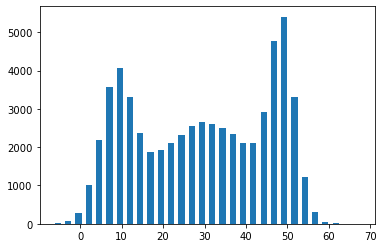

In [21]:
plot_hist_manual(data, width=1.5)

In [22]:
data.mean()

30.77027324989264

In [12]:
for i in range(100):
    random = np.random.RandomState(i)

    data = np.concatenate([random.normal(10, 4, 50),
                      random.normal(25, 8, 50),
                      random.normal(38, 8, 50),
                      random.normal(50, 3, 50),])
    print(data.mean())

31.292360796132634
31.352862082815506
30.729812101914106
30.596421642782293
30.971928974333295
31.058881738779863
30.636938861782756
30.57119573041473
30.767988518550787
30.89768502436793
31.202922947436747
31.000488614729328
30.049948913732575
30.288676308815024
29.52105124140003
30.627706170540286
31.394424605835535
31.133500690699538
31.34830023943566
30.18532844444193
30.750632565816378
30.760010795600415
31.206906279717213
30.856910939958503
31.10863949876275
30.485094039925606
30.426205082209552
31.34258721040858
30.69798298613282
30.700318617175753
30.653370670968705
29.919131505956152
31.164768914359016
30.218547952728823
31.149286633821973
31.275711247819746
30.94998278817073
30.89667300609844
31.783953380654484
30.567867703636324
30.378095911402987
30.57318243277492
30.54443525791787
30.655487869763537
30.50706878741731
30.644384642477945
30.79838329167611
31.286127903929952
30.907684464382445
30.617961907550956
30.32533803575458
30.568756458039854
30.88909919943445
31.068393

# The above distribution is far from being Normal (Gaussian), but it turns out that the distribution of means will be (almost) Normal

To build a confidence interval we will use method called `bootstrap`: 
1. Sample data with repetition
2. Compute mean for each sample
3. Build a distribution of means

In [15]:
def bootstrap(data, random_state=10):
    random = np.random.RandomState(random_state)
    n = data.shape[0]
    idx = random.randint(0, n, n)
    return data[idx]

In [16]:
means = []

for i in range(1000):
    sample = bootstrap(data, i)
    means.append(np.mean(sample))
means = np.array(means)

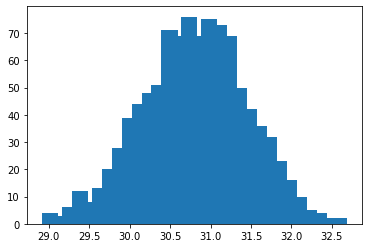

In [18]:
# plt.hist(means, bins=30)

# xx = random.normal(means.mean(), means.std(),1000)
# plt.hist(xx, bins=30, alpha=0.5)

plot_hist_manual(means, bins=30, width=0.2)

In [16]:
from scipy.stats import normaltest 

In [17]:
normaltest(means)

NormaltestResult(statistic=5.4605618546994865, pvalue=0.06520097035924684)

In [18]:
np.quantile(means, 0.025)

28.95486657037387

In [19]:
np.quantile(means, 0.975)

33.21561698350431

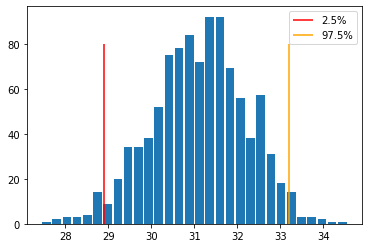

In [20]:
plot_hist_manual(means, bins=30, width=0.2)

ax = plt.gca()
ax.vlines(28.9, 0, 80, color='r', label='2.5%')
ax.vlines(33.21, 0, 80, color='orange', label='97.5%')
plt.legend();